<p align="center">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBS3Qi-wIYWTODEyiJgT4DT6MgT7xd46rGJQ&s" 
       alt="Mental Health Illustration" 
       width="400"/>
</p>


Kesehatan mental adalah salah satu aspek penting dalam kehidupan manusia 💡. Namun, sering kali kondisi ini sulit dipetakan karena dipengaruhi oleh banyak faktor, mulai dari gaya hidup, pola tidur, hingga interaksi sosial. Program ini hadir untuk memberikan **solusi berbasis data** dengan memanfaatkan kekuatan *machine learning* 🤖.  

Tujuan utama program ini adalah **mengklasifikasikan kondisi kesehatan mental** responden ke dalam kategori seperti *Anxiety, Depression, Bipolar,* maupun *PTSD*. Dengan mengolah data yang ada, kita dapat menemukan pola-pola tersembunyi yang sebelumnya tidak mudah dikenali secara manual.  

Tahapan yang digunakan dalam program ini meliputi:  
- 🧹 **Pembersihan Data** → memastikan kualitas data tetap terjaga.  
- 🔍 **EDA (Exploratory Data Analysis)** → menggali pola awal dari distribusi data.  
- ⛏️ **Data Mining** → menerapkan algoritma untuk menemukan hubungan mendalam.  
- 🤖 **Implementasi Model** → menggunakan metode SVM, Random Forest, dan Logistic Regression untuk klasifikasi.  

Dengan pendekatan ini, hasil program diharapkan tidak hanya menghasilkan metrik evaluasi 📈, tetapi juga memberikan **wawasan baru** tentang bagaimana faktor-faktor tertentu berhubungan dengan kesehatan mental. Harapannya, langkah kecil ini bisa menjadi pijakan untuk solusi yang lebih besar dalam meningkatkan kesadaran serta kepedulian terhadap kesehatan mental 🌍❤️.  


# 📚 Definisi Library

In [781]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# 📂 Baca Dataset

## 🗄️ Sumber Data

Data yang digunakan dalam penelitian ini merupakan **data sekunder** yang diperoleh dari platform [Kaggle](https://www.kaggle.com).  
Dataset tersebut berjudul *Mental Health and Lifestyle Habits (2019–2024)* dan dapat diakses melalui tautan berikut:

https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024/data

Dataset ini berisi informasi mengenai berbagai faktor gaya hidup yang berkaitan dengan kesehatan mental, seperti negara asal responden, kelompok usia, jenis kelamin, pola makan, kebiasaan olahraga, jam tidur, tingkat stres, kondisi kesehatan mental, jam kerja, waktu penggunaan layar, interaksi sosial, hingga tingkat kebahagiaan.


In [782]:
dataset = pd.read_csv("Mental_Health_Lifestyle_Dataset.csv")

dataset

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,None,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,None,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,Low,Junk Food,7.1,Low,None,47,7.4,6.3,9.9
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1


## 🧾 Keterangan Data

| **Field**                 | **Deskripsi**                                                                 |
|----------------------------|-------------------------------------------------------------------------------|
| Country                    | Negara responden                                                             |
| Age Group                  | Rentang usia responden (misalnya: 18–24, 25–34)                              |
| Gender                     | Identitas gender responden                                                    |
| Exercise Level             | Jumlah sesi olahraga per minggu                                               |
| Diet Type                  | Jenis pola makan (vegetarian, pescatarian, atau seimbang)                     |
| Sleep Hours                | Rata-rata jam tidur per hari                                                  |
| Stress Level               | Tingkat stres yang dilaporkan sendiri                            |
| Mental Health Condition    | Kondisi kesehatan mental yang sedang dialami responden                        |
| Work Hours Per Week        | Jumlah jam kerja responden per minggu                                         |
| Screen Time Per Day        | Jumlah jam yang dihabiskan di depan layar per hari                            |
| Social Interaction Score   | Tingkat interaksi sosial yang dilaporkan sendiri (skala 1–10)                 |
| Happiness Score            | Tingkat kebahagiaan yang dilaporkan sendiri (skala 1–10)  

# 🧹 Pembersihan Data

## ⭕ Cek Nilai Kosong
Langkah awal dalam proses pembersihan data adalah memeriksa apakah terdapat nilai kosong (*missing values*) pada dataset. Nilai kosong dapat menyebabkan bias dalam analisis maupun gangguan pada algoritma machine learning, karena sebagian besar model tidak dapat memproses data yang tidak lengkap. Dengan melakukan pemeriksaan ini, dapat diketahui kolom mana yang memiliki nilai kosong dan sejauh mana tingkat ketidaklengkapannya. Informasi ini penting sebagai dasar pengambilan keputusan apakah data akan diisi ulang (*imputation*) atau dihapus.


In [783]:
dataset_copy = dataset.replace([None, "None", "Other"], np.nan)

dataset_copy.isnull().sum()

Country                          0
Age                              0
Gender                         996
Exercise Level                   0
Diet Type                        0
Sleep Hours                      0
Stress Level                     0
Mental Health Condition        595
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
dtype: int64

## 🗑️ Penghapusan Data
Setelah dilakukan pengecekan, data yang memiliki nilai kosong dengan jumlah signifikan atau tidak relevan akan dihapus untuk menjaga kualitas dataset. Penghapusan dilakukan secara selektif agar tidak mengurangi representasi data secara keseluruhan. Tujuannya adalah memastikan bahwa hanya data yang bersih, konsisten, dan lengkap yang digunakan pada tahap analisis selanjutnya. Dengan cara ini, model machine learning akan lebih mudah menemukan pola tanpa terganggu oleh anomali maupun kekurangan informasi.

In [784]:
clean_data = dataset_copy.dropna()

clean_data

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
6,Japan,49,Male,Moderate,Junk Food,6.6,Low,Anxiety,28,7.2,5.6,6.9
8,India,60,Male,High,Vegetarian,4.7,Low,Anxiety,33,6.6,3.7,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,USA,57,Male,Moderate,Vegetarian,8.5,Low,Depression,48,4.4,5.1,8.1
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1


# 🔎 EDA (Exploratory Data Analysis)

## 🌍 Distribusi Responden per Negara
Analisis distribusi responden per negara dilakukan untuk melihat representasi sampel penelitian. Dari visualisasi terlihat bahwa terdapat beberapa negara dengan jumlah responden yang dominan, sementara negara lain hanya menyumbang sedikit data. Hal ini penting untuk diperhatikan karena perbedaan jumlah responden dapat memengaruhi generalisasi hasil analisis. Negara dengan jumlah data lebih besar akan lebih berpengaruh terhadap model dibandingkan negara dengan sampel yang kecil.


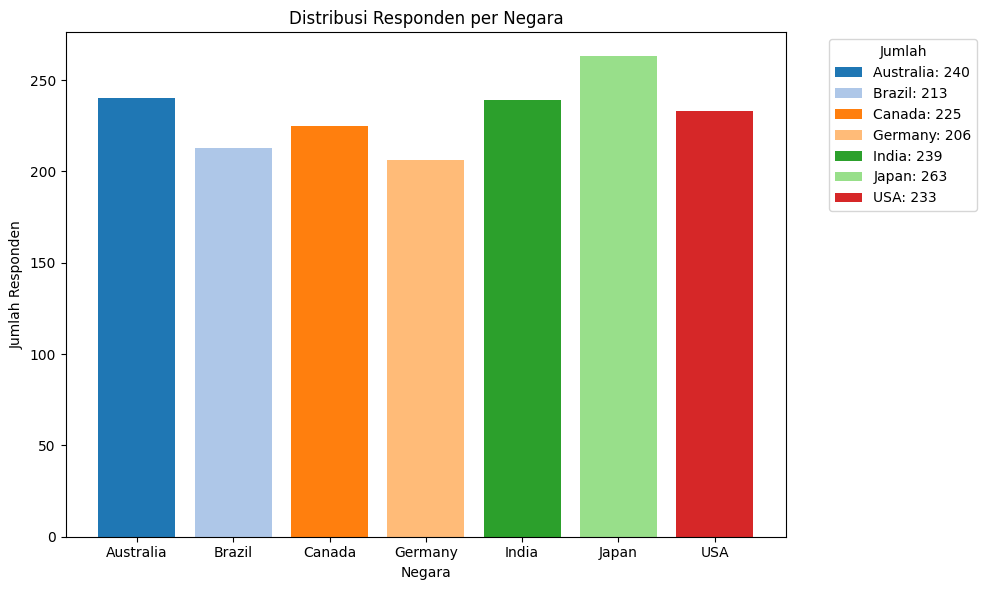

In [785]:
country_counts = clean_data['Country'].value_counts().sort_index()

countries = country_counts.index
values = country_counts.values
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(countries, values, color=colors[:len(countries)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Negara")
ax.set_title("Distribusi Responden per Negara")

labels = [f"{c}: {v}" for c, v in zip(countries, values)]
ax.legend(bars, labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## 🚻 Distribusi Responden per Jenis Kelamin
Distribusi responden berdasarkan jenis kelamin membantu memahami keterwakilan populasi penelitian. Grafik menunjukkan bahwa terdapat perbedaan jumlah responden antara laki-laki, perempuan, dan kategori lainnya. Ketidakseimbangan jumlah responden ini bisa berdampak pada bias analisis, sehingga hasil model mungkin lebih akurat pada kelompok dengan jumlah data yang lebih besar.


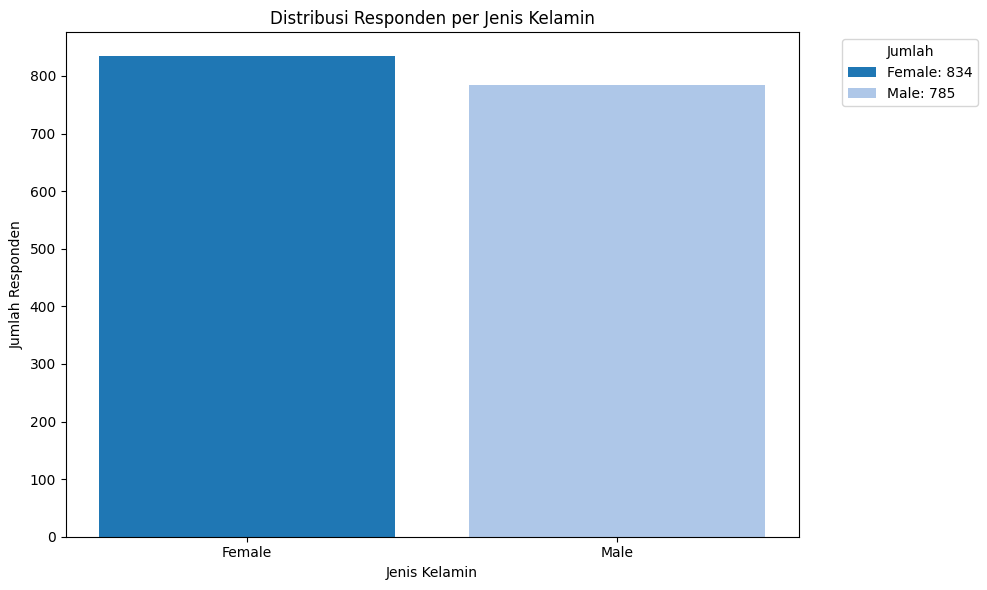

In [786]:
gender_count = clean_data['Gender'].value_counts().sort_index()

gender = gender_count.index
values = gender_count.values
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(gender, values, color=colors[:len(gender)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Jenis Kelamin")
ax.set_title("Distribusi Responden per Jenis Kelamin")

labels = [f"{c}: {v}" for c, v in zip(gender, values)]
ax.legend(bars, labels, title="Jumlah",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## 🧠 Distribusi Responden per Mental Health Condition
Distribusi responden berdasarkan kondisi kesehatan mental menggambarkan proporsi setiap kategori seperti Anxiety, Depression, Bipolar, maupun PTSD. Dari hasil visualisasi terlihat bahwa tidak semua kategori memiliki jumlah responden yang sama. Kondisi dengan jumlah responden lebih sedikit dapat menimbulkan tantangan bagi model klasifikasi, karena data yang tidak seimbang cenderung membuat model kurang mampu mengenali kategori minoritas.


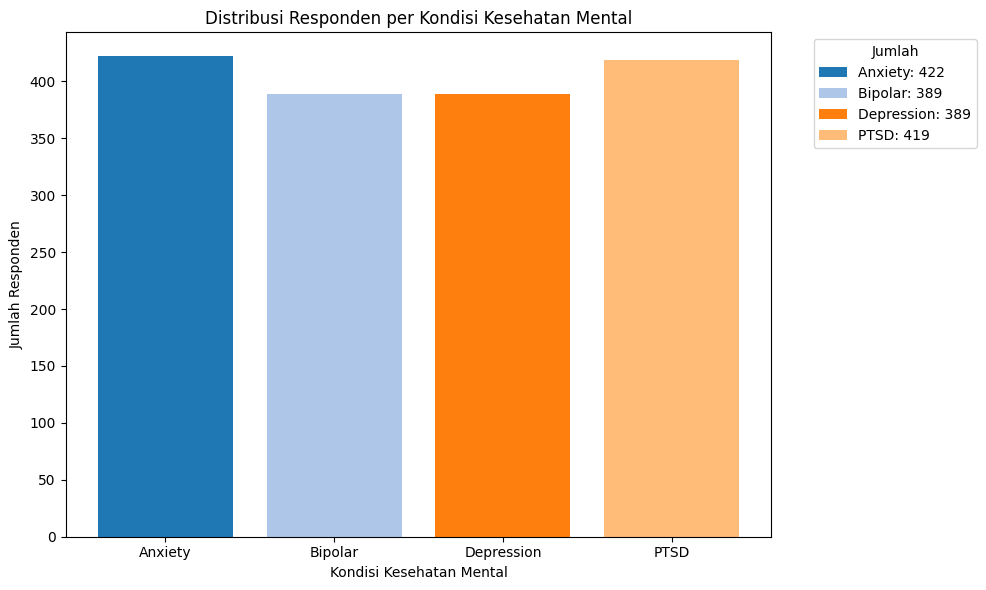

In [787]:
condition_count = clean_data['Mental Health Condition'].value_counts(
).sort_index()

condition = condition_count.index
values = condition_count.values
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(condition, values, color=colors[:len(condition)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Kondisi Kesehatan Mental")
ax.set_title("Distribusi Responden per Kondisi Kesehatan Mental")

labels = [f"{c}: {v}" for c, v in zip(condition, values)]
ax.legend(bars, labels, title="Jumlah",bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## 🌐 Distribusi Kondisi Kesehatan Mental per Negara
Analisis ini menghubungkan kondisi kesehatan mental dengan asal negara responden. Hasilnya memperlihatkan variasi kondisi mental pada masing-masing negara, misalnya ada negara yang lebih banyak memiliki kasus Anxiety, sementara negara lain lebih dominan dengan kasus Depression atau PTSD. Informasi ini penting untuk memahami pola distribusi kesehatan mental yang mungkin dipengaruhi oleh faktor budaya, sosial, maupun ekonomi.


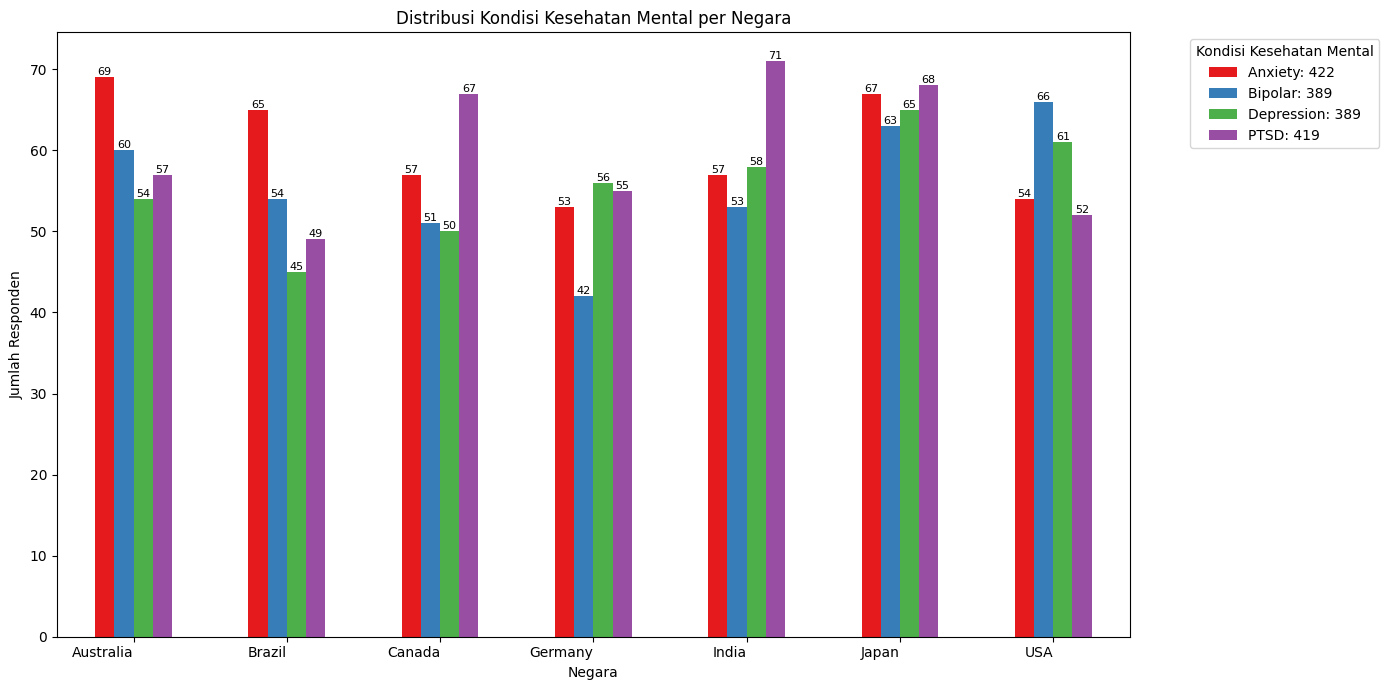

In [788]:
cross_tab = pd.crosstab(clean_data['Country'], clean_data['Mental Health Condition'])

custom_colors = ['#e41a1c', '#377eb8', '#4daf4a',
                 '#984ea3', '#ff7f00', '#a65628']


ax = cross_tab.plot(kind="bar",figsize=(14, 7), color=custom_colors[:len(cross_tab.columns)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Negara")
ax.set_title("Distribusi Kondisi Kesehatan Mental per Negara")
plt.xticks(rotation=0, ha='right')

totals = cross_tab.sum(axis=0)
labels = [f"{cond}: {totals[cond]}" for cond in cross_tab.columns]

ax.legend(labels,title="Kondisi Kesehatan Mental",bbox_to_anchor=(1.05, 1),
          loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()


## ⚖️ Distribusi Kondisi Kesehatan Mental per Jenis Kelamin
Distribusi kondisi kesehatan mental berdasarkan jenis kelamin memberikan gambaran mengenai perbedaan kecenderungan tiap kelompok. Misalnya, terdapat kelompok gender tertentu yang lebih dominan mengalami Anxiety atau Depression dibandingkan kelompok lainnya. Hal ini memberikan wawasan tambahan tentang faktor demografis yang dapat berhubungan dengan kerentanan terhadap kondisi kesehatan mental.


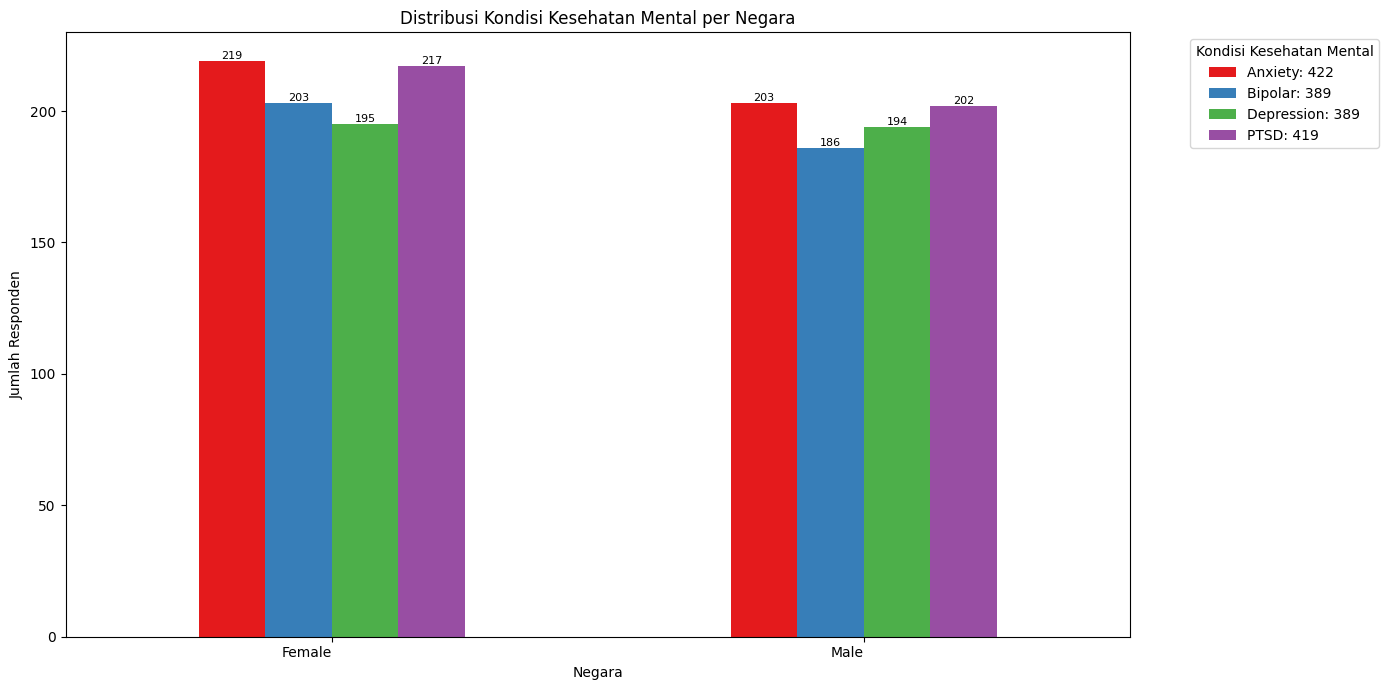

In [789]:
cross_tab = pd.crosstab(
    clean_data['Gender'], clean_data['Mental Health Condition'])

custom_colors = ['#e41a1c', '#377eb8', '#4daf4a',
                 '#984ea3', '#ff7f00', '#a65628']


ax = cross_tab.plot(kind="bar", figsize=(
    14, 7), color=custom_colors[:len(cross_tab.columns)])

ax.set_ylabel("Jumlah Responden")
ax.set_xlabel("Negara")
ax.set_title("Distribusi Kondisi Kesehatan Mental per Negara")
plt.xticks(rotation=0, ha='right')

totals = cross_tab.sum(axis=0)
labels = [f"{cond}: {totals[cond]}" for cond in cross_tab.columns]

ax.legend(labels, title="Kondisi Kesehatan Mental", bbox_to_anchor=(1.05, 1),
          loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()


# ⛏️ Data Mining

## 🎛️ Correlation Matrix

Correlation matrix digunakan untuk melihat sejauh mana hubungan antar variabel dalam dataset. Nilai korelasi berada pada rentang -1 hingga +1, di mana nilai mendekati +1 menunjukkan hubungan positif yang kuat, nilai mendekati -1 menunjukkan hubungan negatif yang kuat, dan nilai mendekati 0 menunjukkan hubungan yang lemah atau hampir tidak ada. Pada heatmap, warna merah menggambarkan korelasi positif, sedangkan warna biru menunjukkan korelasi negatif. Semakin pekat warnanya, semakin kuat pula hubungan antar variabel tersebut. Analisis ini berguna untuk mengidentifikasi variabel yang memiliki keterkaitan tinggi, mendeteksi potensi multikolinearitas, serta membantu pemilihan fitur yang relevan dalam proses pemodelan machine learning.


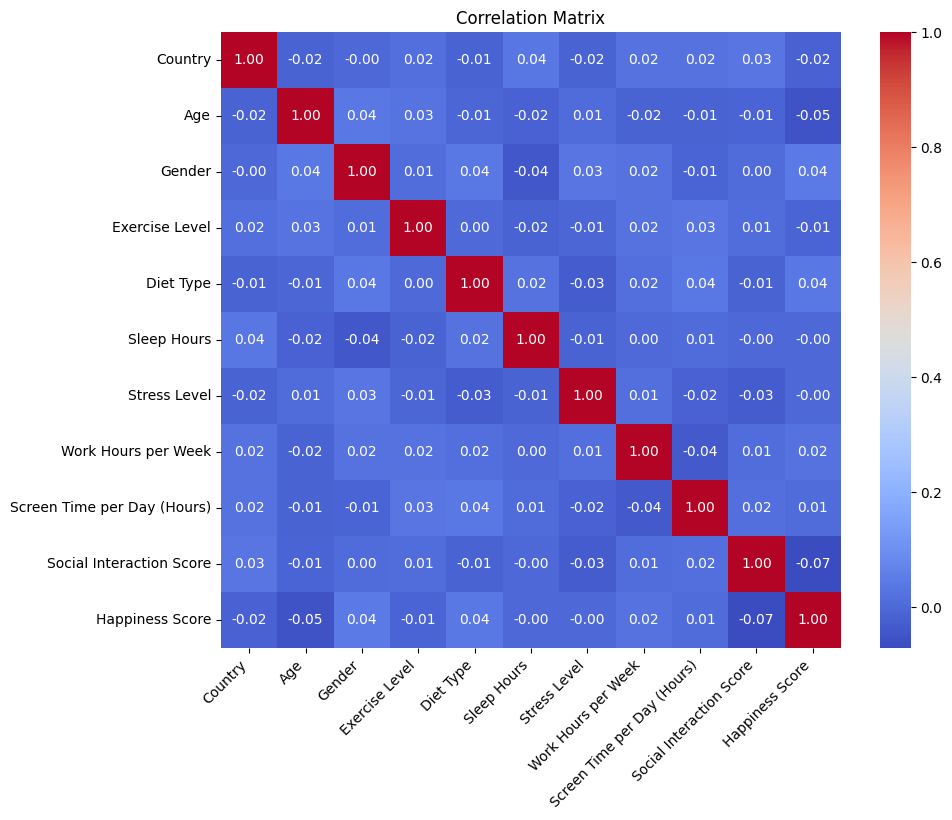

In [790]:
# Copy data
corr_clean_data = clean_data.copy()

# Drop kolom "Mental Health Condition" jika ada
if "Mental Health Condition" in corr_clean_data.columns:
    corr_clean_data = corr_clean_data.drop(columns=["Mental Health Condition"])

# Encoding kolom kategorikal
label_enc = LabelEncoder()
for col in corr_clean_data.select_dtypes(include=['object']).columns:
    corr_clean_data[col] = label_enc.fit_transform(
        corr_clean_data[col].astype(str))


# Hitung korelasi
corr = corr_clean_data.corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right')
plt.show()


### 📊 Hubungan Antar Fitur Berdasarkan Correlation Matrix

| **Fitur**                    | **Hubungan Terkuat (dari matrix)** | **Nilai Korelasi** | **Interpretasi**                                                                                                 |
| ---------------------------- | ---------------------------------- | ------------------ | ---------------------------------------------------------------------------------------------------------------- |
| **Sleep Hours**              | Country                            | **0.04**           | Hubungan linear sangat lemah; jam tidur tidak banyak dipengaruhi lokasi responden.                               |
| **Stress Level**             | Gender                             | **0.03**           | Korelasi sangat kecil; stres hampir independen dari faktor gender.                                               |
| **Screen Time per Day**      | Sleep Hours                        | **0.04**           | Sedikit korelasi positif; makin tinggi screen time, jam tidur sedikit bertambah (meski hampir tidak signifikan). |
| **Social Interaction Score** | Happiness Score                    | **-0.07**          | Korelasi negatif kecil; makin rendah interaksi sosial, sedikit cenderung menurunkan kebahagiaan.                 |
| **Happiness Score**          | Gender                             | **0.04**           | Korelasi positif lemah; gender berhubungan sangat kecil dengan kebahagiaan.                                      |
| **Exercise Level**           | Age                                | **0.03**           | Korelasi sangat kecil; usia tidak berhubungan linear kuat dengan aktivitas olahraga.                             |
| **Work Hours per Week**      | Gender                             | **0.02**           | Hubungan lemah sekali; jam kerja hampir tidak dipengaruhi gender.                                                |

---

### 📝 Penjelasan
Berdasarkan correlation matrix, fitur-fitur di atas dipilih karena tidak memiliki korelasi kuat dengan variabel lain sehingga memberikan informasi yang unik. Meskipun nilai korelasinya mendekati nol, secara logis fitur-fitur tersebut memiliki relevansi terhadap kesehatan mental, seperti jam tidur, tingkat stres, kebiasaan olahraga, waktu kerja, hingga interaksi sosial. Oleh karena itu, fitur-fitur ini tetap dipertahankan agar model prediksi kesehatan mental dapat menangkap pola yang bersifat non-linear dan meningkatkan akurasi.


## 📌 Kategori Variabel dalam Dataset

Pada tahap ini, beberapa variabel numerik dalam dataset diubah menjadi **kategori** menggunakan metode *binning* dengan fungsi `pd.cut()`. Tujuannya adalah untuk mempermudah analisis, terutama ketika ingin melihat hubungan antar-variabel dalam bentuk diskrit.  

<table border="1" cellspacing="0" cellpadding="6">
  <tr>
    <th>Variabel </th>
    <th>Rentang</th>
    <th>Label Kategori</th>
  </tr>
  <tr>
    <td rowspan="3"> Sleep Hours</td>
    <td>0–5</td>
    <td>Kurang Tidur</td>
  </tr>
  <tr>
    <td>5–7</td>
    <td>Cukup Tidur</td>
  </tr>
  <tr>
    <td>7–12</td>
    <td>Tidur Panjang</td>
  </tr>
  <tr>
    <td rowspan="3"> Screen Time per Day (Hours)</td>
    <td>0–3</td>
    <td>Rendah</td>
  </tr>
  <tr>
    <td>3–6</td>
    <td>Sedang</td>
  </tr>
  <tr>
    <td>6–12</td>
    <td>Tinggi</td>
  </tr>
  <tr>
    <td rowspan="3"> Social Interaction Score</td>
    <td>0–3.5</td>
    <td>Rendah</td>
  </tr>
  <tr>
    <td>3.5–7</td>
    <td>Sedang</td>
  </tr>
  <tr>
    <td>7–10</td>
    <td>Tinggi</td>
  </tr>
  <tr>
    <td rowspan="3"> Happiness Score</td>
    <td>0–3.5</td>
    <td>Rendah</td>
  </tr>
  <tr>
    <td>3.5–7</td>
    <td>Sedang</td>
  </tr>
  <tr>
    <td>7–10</td>
    <td>Tinggi</td>
  </tr>
  <tr>
    <td rowspan="3"> Work Hours per Week</td>
    <td>0–20</td>
    <td>Ringan</td>
  </tr>
  <tr>
    <td>20–40</td>
    <td>Normal</td>
  </tr>
  <tr>
    <td>40–80</td>
    <td>Berat</td>
  </tr>
</table>


In [791]:
clean_data = clean_data.copy()

# Sleep Hours
clean_data['Sleep Category'] = pd.cut(clean_data['Sleep Hours'],
                                      bins=[0, 5, 7, 12],
                                      labels=['Kurang Tidur', 'Cukup Tidur', 'Tidur Panjang'])

# Screen Time per Day (Hours)
clean_data['Screen Time Category'] = pd.cut(clean_data['Screen Time per Day (Hours)'],
                                            bins=[0, 3, 6, 12],
                                            labels=['Rendah', 'Sedang', 'Tinggi'])

# Social Interaction Score 
clean_data['Social Interaction Category'] = pd.cut(clean_data['Social Interaction Score'],
                                                   bins=[0, 3.5, 7, 10],
                                                   labels=['Rendah', 'Sedang', 'Tinggi'])

# Happiness Score
clean_data['Happiness Category'] = pd.cut(clean_data['Happiness Score'],
                                          bins=[0, 3.5, 7, 10],
                                          labels=['Rendah', 'Sedang', 'Tinggi'])

# Work Hours per Week
clean_data['Work Hours Category'] = pd.cut(clean_data['Work Hours per Week'],
                                           bins=[0, 20, 40, 80],
                                           labels=['Ringan', 'Normal', 'Berat'])


clean_data


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Sleep Category,Screen Time Category,Social Interaction Category,Happiness Category,Work Hours Category
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8,Kurang Tidur,Sedang,Tinggi,Sedang,Berat
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6,Tidur Panjang,Rendah,Tinggi,Sedang,Berat
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4,Tidur Panjang,Sedang,Sedang,Sedang,Normal
6,Japan,49,Male,Moderate,Junk Food,6.6,Low,Anxiety,28,7.2,5.6,6.9,Cukup Tidur,Tinggi,Sedang,Sedang,Normal
8,India,60,Male,High,Vegetarian,4.7,Low,Anxiety,33,6.6,3.7,5.2,Kurang Tidur,Tinggi,Sedang,Sedang,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,USA,57,Male,Moderate,Vegetarian,8.5,Low,Depression,48,4.4,5.1,8.1,Tidur Panjang,Sedang,Sedang,Tinggi,Berat
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9,Cukup Tidur,Sedang,Tinggi,Sedang,Normal
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1,Cukup Tidur,Sedang,Sedang,Sedang,Normal
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1,Cukup Tidur,Sedang,Sedang,Sedang,Berat


## 🎯 Pemilihan Feature dan Label

Pada tahap ini dilakukan pemisahan antara **feature** (variabel input) dan **label** (variabel target) untuk keperluan pemodelan machine learning.  

In [792]:
feature_cols = [
    "Sleep Category",
    "Stress Level",
    "Screen Time Category",
    "Social Interaction Category",
    "Happiness Category",
    "Exercise Level",
    "Work Hours Category"
]

feature = clean_data[feature_cols]
label = clean_data["Mental Health Condition"]


## 🔢 Encoding Kategori ke Bentuk Numerik

Untuk mempersiapkan data sebelum digunakan dalam model machine learning, setiap variabel kategori di-*encode* menjadi nilai numerik. Proses ini dilakukan dengan `replace()` pada setiap kolom kategori.  

<table border="1" cellspacing="0" cellpadding="6">
  <tr>
    <th>Variabel Asli</th>
    <th>Kategori</th>
    <th>Nilai Encode</th>
  </tr>
  <tr>
    <td rowspan="3"> Sleep Category</td>
    <td>Kurang Tidur</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Cukup Tidur</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Tidur Panjang</td>
    <td>2</td>
  </tr>
  <tr>
    <td rowspan="3"> Stress Level</td>
    <td>Low</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Moderate</td>
    <td>1</td>
  </tr>
  <tr>
    <td>High</td>
    <td>2</td>
  </tr>
  <tr>
    <td rowspan="3"> Screen Time Category</td>
    <td>Rendah</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Sedang</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Tinggi</td>
    <td>2</td>
  </tr>
  <tr>
    <td rowspan="3"> Social Interaction Category</td>
    <td>Rendah</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Sedang</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Tinggi</td>
    <td>2</td>
  </tr>
  <tr>
    <td rowspan="3"> Happiness Category</td>
    <td>Rendah</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Sedang</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Tinggi</td>
    <td>2</td>
  </tr>
  <tr>
    <td rowspan="3"> Exercise Level</td>
    <td>Low</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Moderate</td>
    <td>1</td>
  </tr>
  <tr>
    <td>High</td>
    <td>2</td>
  </tr>
  <tr>
    <td rowspan="3"> Work Hours Category</td>
    <td>Ringan</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Normal</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Berat</td>
    <td>2</td>
  </tr>
</table>


In [793]:
feature_encoded = feature.copy()

# Sleep Category
feature_encoded['Sleep Category'] = feature['Sleep Category'].replace({
    'Kurang Tidur': 0,
    'Cukup Tidur': 1,
    'Tidur Panjang': 2
})

# Stress Level
feature_encoded['Stress Level'] = feature['Stress Level'].replace({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})

# Screen Time Category
feature_encoded['Screen Time Category'] = feature['Screen Time Category'].replace({
    'Rendah': 0,
    'Sedang': 1,
    'Tinggi': 2
})

# Social Interaction Category
feature_encoded['Social Interaction Category'] = feature['Social Interaction Category'].replace({
    'Rendah': 0,
    'Sedang': 1,
    'Tinggi': 2
})

# Happiness Category
feature_encoded['Happiness Category'] = feature['Happiness Category'].replace({
    'Rendah': 0,
    'Sedang': 1,
    'Tinggi': 2
})

# Exercise Level
feature_encoded['Exercise Level'] = feature['Exercise Level'].replace({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})

# Work Hours Category
feature_encoded['Work Hours Category'] = feature['Work Hours Category'].replace({
    'Ringan': 0,
    'Normal': 1,
    'Berat': 2
})


feature_encoded

,Sleep Category,Stress Level,Screen Time Category,Social Interaction Category,Happiness Category,Exercise Level,Work Hours Category
1,0,0,1,2,1,1,2
3,2,0,0,2,1,0,2
4,2,0,1,1,1,0,1
6,1,0,2,1,1,1,1
8,0,0,2,1,1,2,1
...,...,...,...,...,...,...,...
2992,2,0,1,1,2,1,2
2995,1,2,1,2,1,1,1
2997,1,2,1,1,1,1,1
2998,1,0,1,1,1,2,2


## ⚙️ Standarisasi dan Pembagian Data

- **Standarisasi Fitur**  
  Seluruh fitur numerik dilakukan standarisasi menggunakan `StandardScaler()` agar memiliki distribusi dengan rata-rata 0 dan standar deviasi 1. Hal ini penting untuk meningkatkan performa algoritma machine learning yang sensitif terhadap skala data.

- **Split Data**  
  Dataset dibagi menjadi **train** dan **test** dengan perbandingan **80% : 20%** menggunakan `train_test_split()`.  
  - `X_train`, `y_train` → digunakan untuk melatih model  
  - `X_test`, `y_test` → digunakan untuk evaluasi model  
  - Parameter `stratify=label` digunakan agar proporsi kelas pada train dan test tetap seimbang.  


In [794]:
# Standarisasi fitur numerik
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature_encoded)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    feature_scaled, label, test_size=0.2, random_state=42, stratify=label
)


# 🤖 Implementasi Model

## 🧩 Support Vector Machine (SVM)  
Support Vector Machine digunakan untuk mengklasifikasikan kondisi kesehatan mental berdasarkan fitur yang telah diekstraksi. Algoritma ini bekerja dengan mencari **hyperplane terbaik** yang memisahkan kelas satu dengan yang lain dalam ruang berdimensi tinggi. Pada confusion matrix terlihat bahwa prediksi tersebar merata ke berbagai kelas, menunjukkan adanya kesulitan dalam membedakan kategori secara jelas. 

Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

     Anxiety       0.26      0.24      0.25        84
     Bipolar       0.20      0.24      0.22        78
  Depression       0.32      0.28      0.30        78
        PTSD       0.35      0.36      0.35        84

    accuracy                           0.28       324
   macro avg       0.28      0.28      0.28       324
weighted avg       0.28      0.28      0.28       324



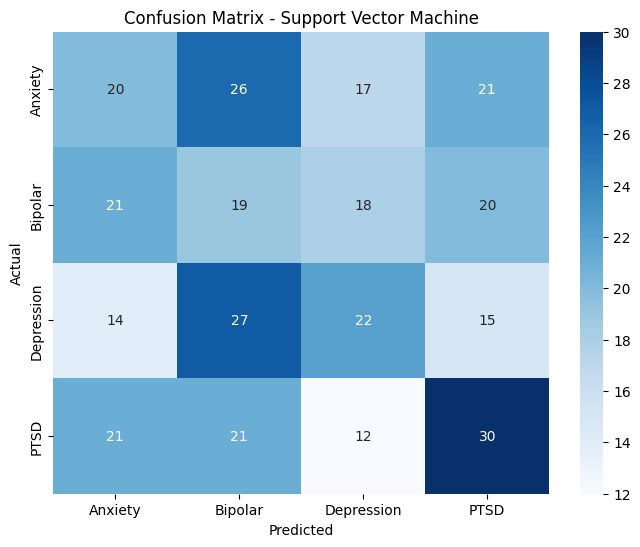

In [795]:
svm_model = SVC(kernel="rbf", C=1, gamma="scale",
                class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Classification Report - Support Vector Machine:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(label),
            yticklabels=np.unique(label))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()


### 📝 Ringkasan Hasil  
Berdasarkan classification report, SVM memperoleh nilai **akurasi 28%** dengan rata-rata precision, recall, dan f1-score sebesar **0.28**.  
- Kinerja terbaik terlihat pada kelas **PTSD** dengan recall **0.36**.  
- Kelas **Bipolar** memiliki nilai precision terendah, menandakan kelemahan model dalam membedakan kategori ini.  

Secara keseluruhan, SVM cukup mampu mengenali PTSD, namun masih kesulitan dalam membedakan Anxiety dan Bipolar. Hal ini bisa terjadi karena **batas pemisahan antar kelas tidak cukup jelas** dalam ruang fitur, sehingga SVM tidak mampu menemukan hyperplane yang optimal untuk memisahkan kategori yang memiliki distribusi mirip.  


## 🌳 Random Forest  
Random Forest adalah metode **ensemble learning** yang menggabungkan banyak decision tree untuk meningkatkan akurasi prediksi. Confusion matrix menunjukkan bahwa prediksi cenderung terdistribusi secara seimbang, meskipun masih terdapat kesalahan klasifikasi antar kelas.  


Classification Report - Random Forest:
              precision    recall  f1-score   support

     Anxiety       0.20      0.18      0.19        84
     Bipolar       0.21      0.19      0.20        78
  Depression       0.30      0.31      0.30        78
        PTSD       0.25      0.29      0.27        84

    accuracy                           0.24       324
   macro avg       0.24      0.24      0.24       324
weighted avg       0.24      0.24      0.24       324



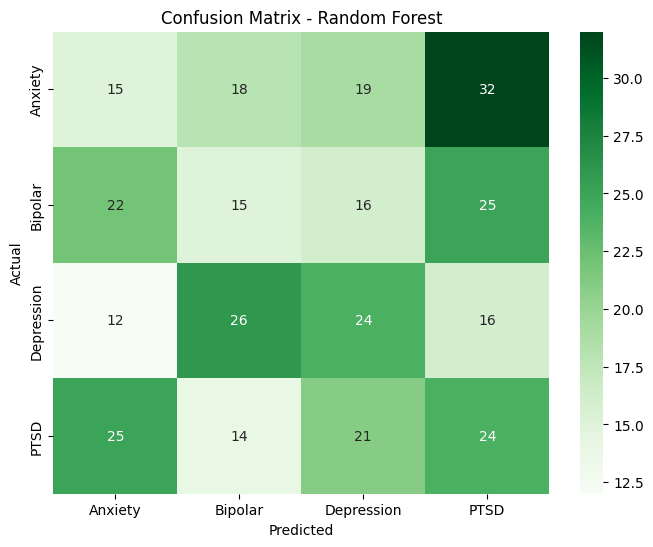

In [796]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(label),
            yticklabels=np.unique(label))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


### 📝 Ringkasan Hasil  
Dari classification report, Random Forest memiliki **akurasi 24%** dengan rata-rata precision, recall, dan f1-score sebesar **0.24**.  
- Performa relatif lebih baik pada kelas **Depression** dengan recall **0.31**.  
- Kinerja terendah terlihat pada kelas **Anxiety** dengan precision rendah.  

Secara umum, Random Forest belum mampu memberikan prediksi yang konsisten pada seluruh kelas. Hal ini kemungkinan terjadi karena **model menangkap noise terlalu banyak dari data latih** (overfitting sebagian pada pola tertentu), sehingga performanya menurun saat diaplikasikan pada data uji.  



## 📉 Logistic Regression  
Logistic Regression digunakan untuk memprediksi probabilitas keanggotaan kelas berdasarkan fungsi logit. Dari confusion matrix terlihat bahwa model cenderung **lebih sering memprediksi Anxiety**, sementara prediksi untuk Depression dan PTSD masih cukup rendah.  


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

     Anxiety       0.25      0.37      0.30        84
     Bipolar       0.22      0.26      0.24        78
  Depression       0.33      0.14      0.20        78
        PTSD       0.22      0.20      0.21        84

    accuracy                           0.24       324
   macro avg       0.26      0.24      0.24       324
weighted avg       0.26      0.24      0.24       324



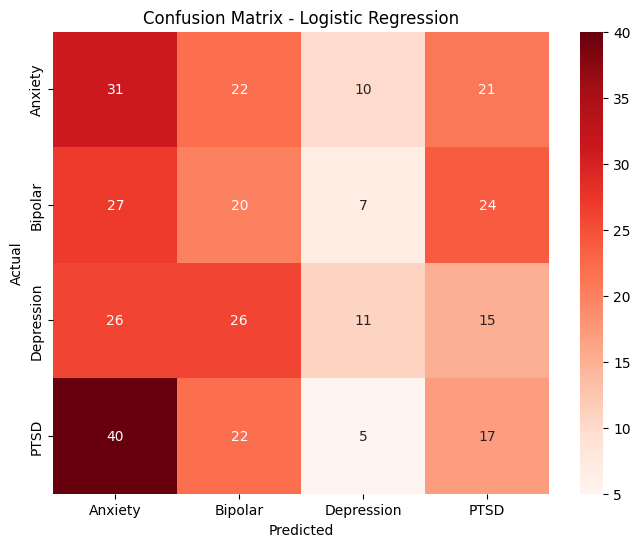

In [797]:
# Logistic Regression (multi-class pakai softmax)
log_reg = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Prediksi
y_pred = log_reg.predict(X_test)

# Evaluasi
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=np.unique(label),
            yticklabels=np.unique(label))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### 📝 Ringkasan Hasil  
Classification report menunjukkan akurasi sebesar **24%** dengan rata-rata precision **0.26**, recall **0.24**, dan f1-score **0.24**.  
- Performa terbaik pada kelas **Anxiety** dengan recall **0.37**.  
- Performa terlemah ada pada **Depression** dengan recall hanya **0.14**.  

Secara umum, Logistic Regression lebih mampu mengenali Anxiety, namun masih lemah dalam mendeteksi Depression. Hal ini bisa disebabkan karena **hubungan antar variabel dalam dataset tidak linear**, sedangkan Logistic Regression hanya dapat memodelkan hubungan linear, sehingga pola kompleks antar fitur tidak terwakili dengan baik.  